# 1) Importing Requered Libraries

## INDEX :-
## 1. Importing Required Libraries

## 2. Loading the Dataset

## 3. Exploratory Data Analysis

##. Understanding the dataset

* Head of the dataset
* Shape of the data set
* Types of columns
* Information about data set
* Summary of the data set

###  b. Data Cleaning
* Dropping duplicate values
* Checking NULL values
* Checking for 0 value

## 4. Data Visualization
Here we are going to plot :-
* Count Plot :- to see if the dataset is balanced or not
* Histograms :- to see if data is normally distributed or skewed
* Box Plot :- to analyse the distribution and see the outliers
* Scatter plots :- to understand relationship between any two variables
* Pair plot :- to create scatter plot between all the variables

## 5. Feature Selection

## 6. Handling Outliers

## 7. Split the Data Frame into X and y

## 8. TRAIN TEST SPLIT

## 9. Build the Classification Algorithm

### 9.1 Logistic Regression

### 9.2 Naive Bayes

### 9.3 SVM

### 9.4 Decision Tree

### 9.5 Random Forest

### 9.6 KNN



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2) Load the Dataset

In [2]:
df = pd.read_csv('/Users/bhojraj/Downloads/diabetes.csv')

# 3) Exploring Data Analysis
## a) Understanding the data
* Head of DataSet
* Shape of DataSet
* Type of Column
* Information about Dataset
* Summary of Dataset

In [3]:
df.head() # Get familier with dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape #Getting the know about rows and columns we are dealing with

(768, 9)

In [5]:
df.columns #learning about columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info() #print the concise summary of a DataFrame . this information about dataset including the index,dtype and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.dtypes # knowing about DataSet

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.describe() #It help to understand how data has been spread across the table

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Conclusion:
## We obsorve that min value of some column is 0 , which can not be medically  possible , hence, the data cleaning process , we will have to replace them. with median/mean valus depending on the distribution , also in the max column we can see Insulin levels are as high as 846! we have to treat them as outliers.

## b) Data Cleaning:
* Dropping Duplicate values
* checking NULL values
* Checking for 0 values and replacing it
### It isn't medically possible for some data record to have '0' value's such as BloodPressure , Glucose levels , hence, we replace them with the mean value of that column.

# Dropping duplicate values:

In [9]:
df.drop_duplicates() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Check for missing values.
### count and print the sum of every column.

In [10]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## checking  for 0 values in  columns, Age and DiabetesPedigreeFuncion  does not have minimum 0 values. so no need to replace . Aslo no of pragnencies could be 0.

In [11]:
print(df[df['BloodPressure'] == 0].shape[0])
print(df[df['Glucose'] == 0].shape[0])
print(df[df['SkinThickness'] == 0].shape[0])
print(df[df['Insulin'] == 0].shape[0])
print(df[df['BMI'] == 0].shape)

35
5
227
374
(11, 9)


## Note: 
### Some of the columns have a skewed distribution so the mean is more affected by outliers than the median, Glucose and BloodPresssure have normal distribution , hence we replace 0 values in this column by mean ans rest by median 

# Replacing 0 values with median of columns.

In [12]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())

# 4) Data Visualization:
* countplot: To see the dataset is balanced or not 
* Histogram: To see the data is normally distributed or not
* Box Plot: To anylize the distribution and see variable
* Scatterplot: To understand relation between two variable
* Pairplot: To create scatterplot between all variables

<Axes: xlabel='Outcome', ylabel='count'>

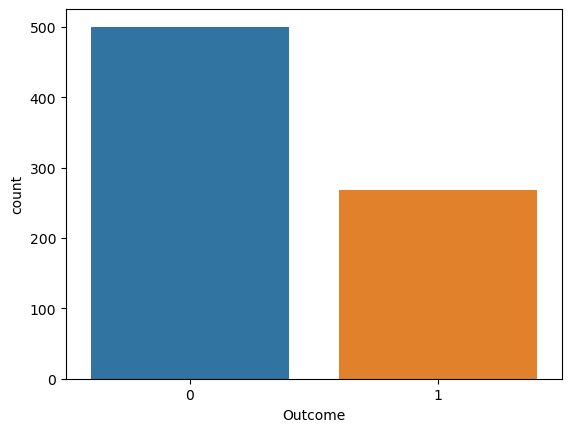

In [13]:
sns.countplot(x='Outcome', data=df)


## Conclusion: we oberve that number of people that do not have diabetes is far more than number of people who have diabetes

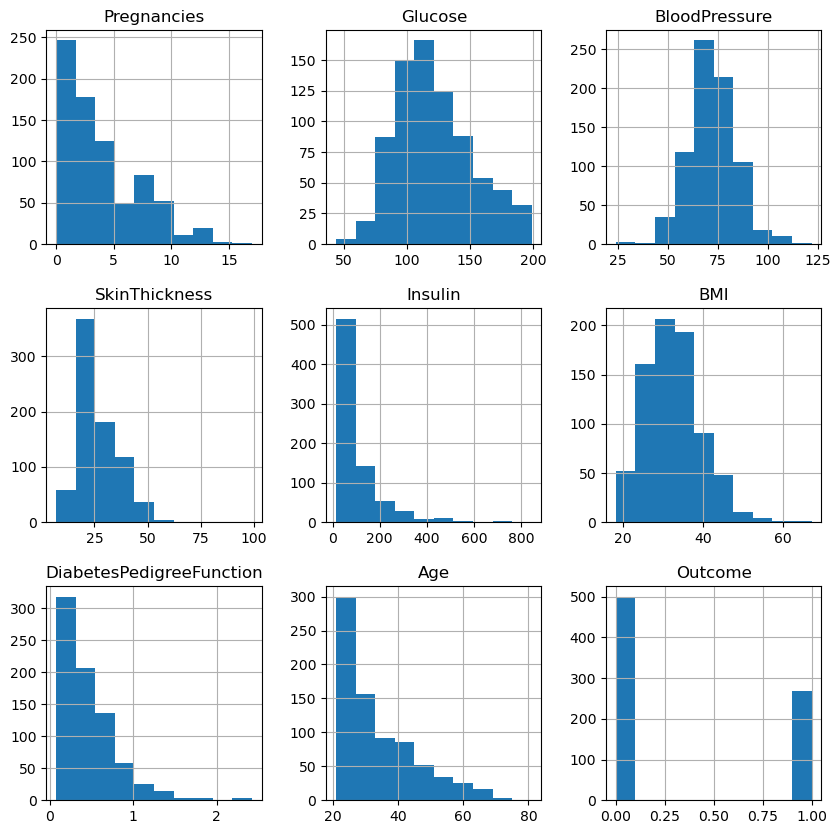

In [14]:
df.hist(bins = 10, figsize = (10,10))
plt.show()

### Conclusion: In above histogram we can see the Insulin and Bloodpressure is normally distributed and rest are skwed and have outlier.

<Axes: xlabel='DiabetesPedigreeFunction'>

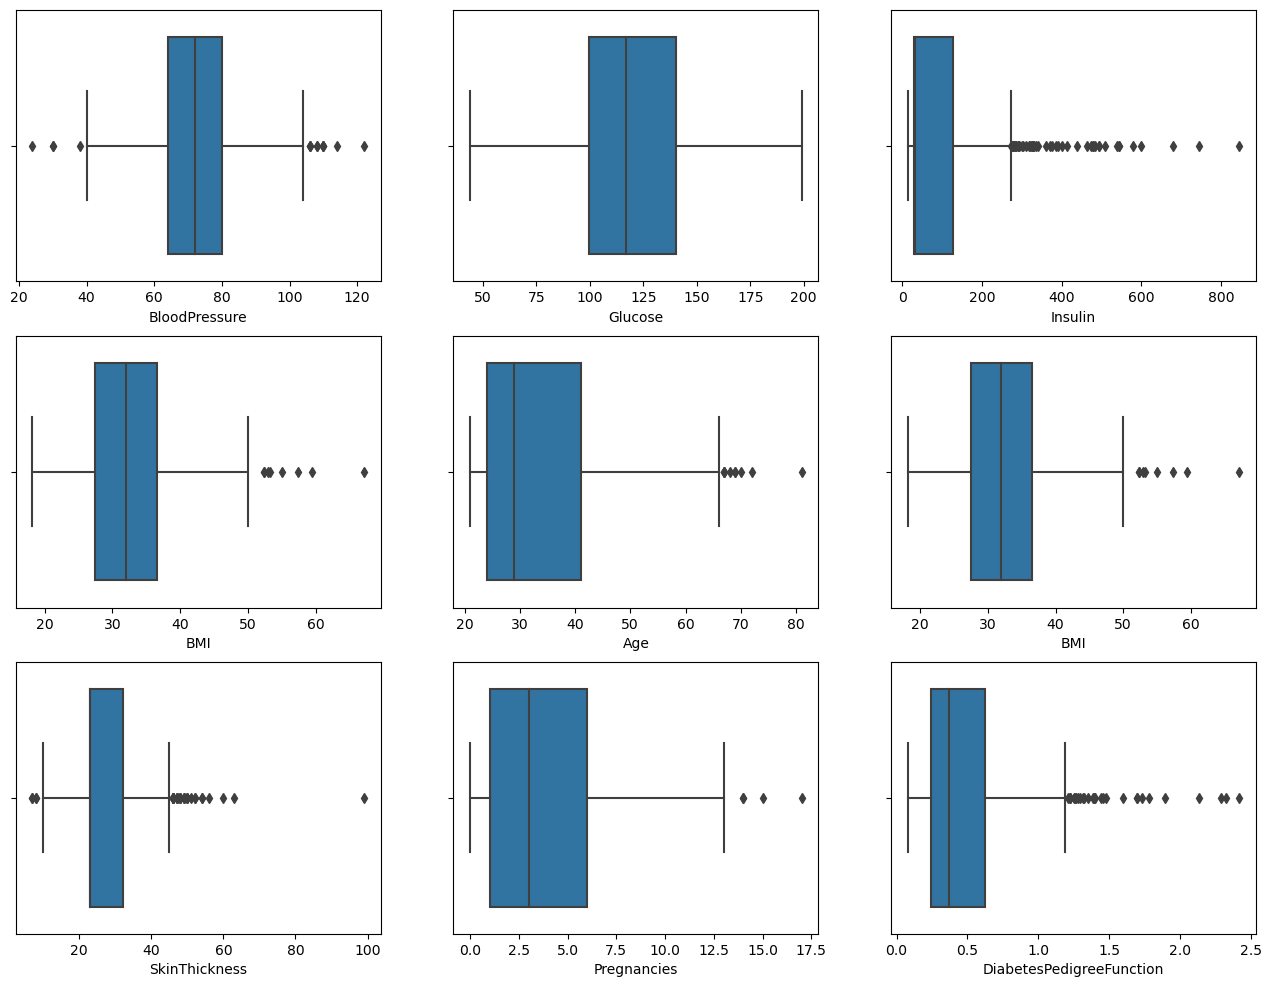

In [15]:
plt.figure(figsize = (16,12))
sns.set_style = 'whitegrid'
plt.subplot(3,3,1)
sns.boxplot(x = 'BloodPressure', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Glucose', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Insulin', data = df)
plt.subplot(3,3,4)
sns.boxplot(x ='BMI', data =df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Age',data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'BMI', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'SkinThickness', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'Pregnancies', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'DiabetesPedigreeFunction', data = df)

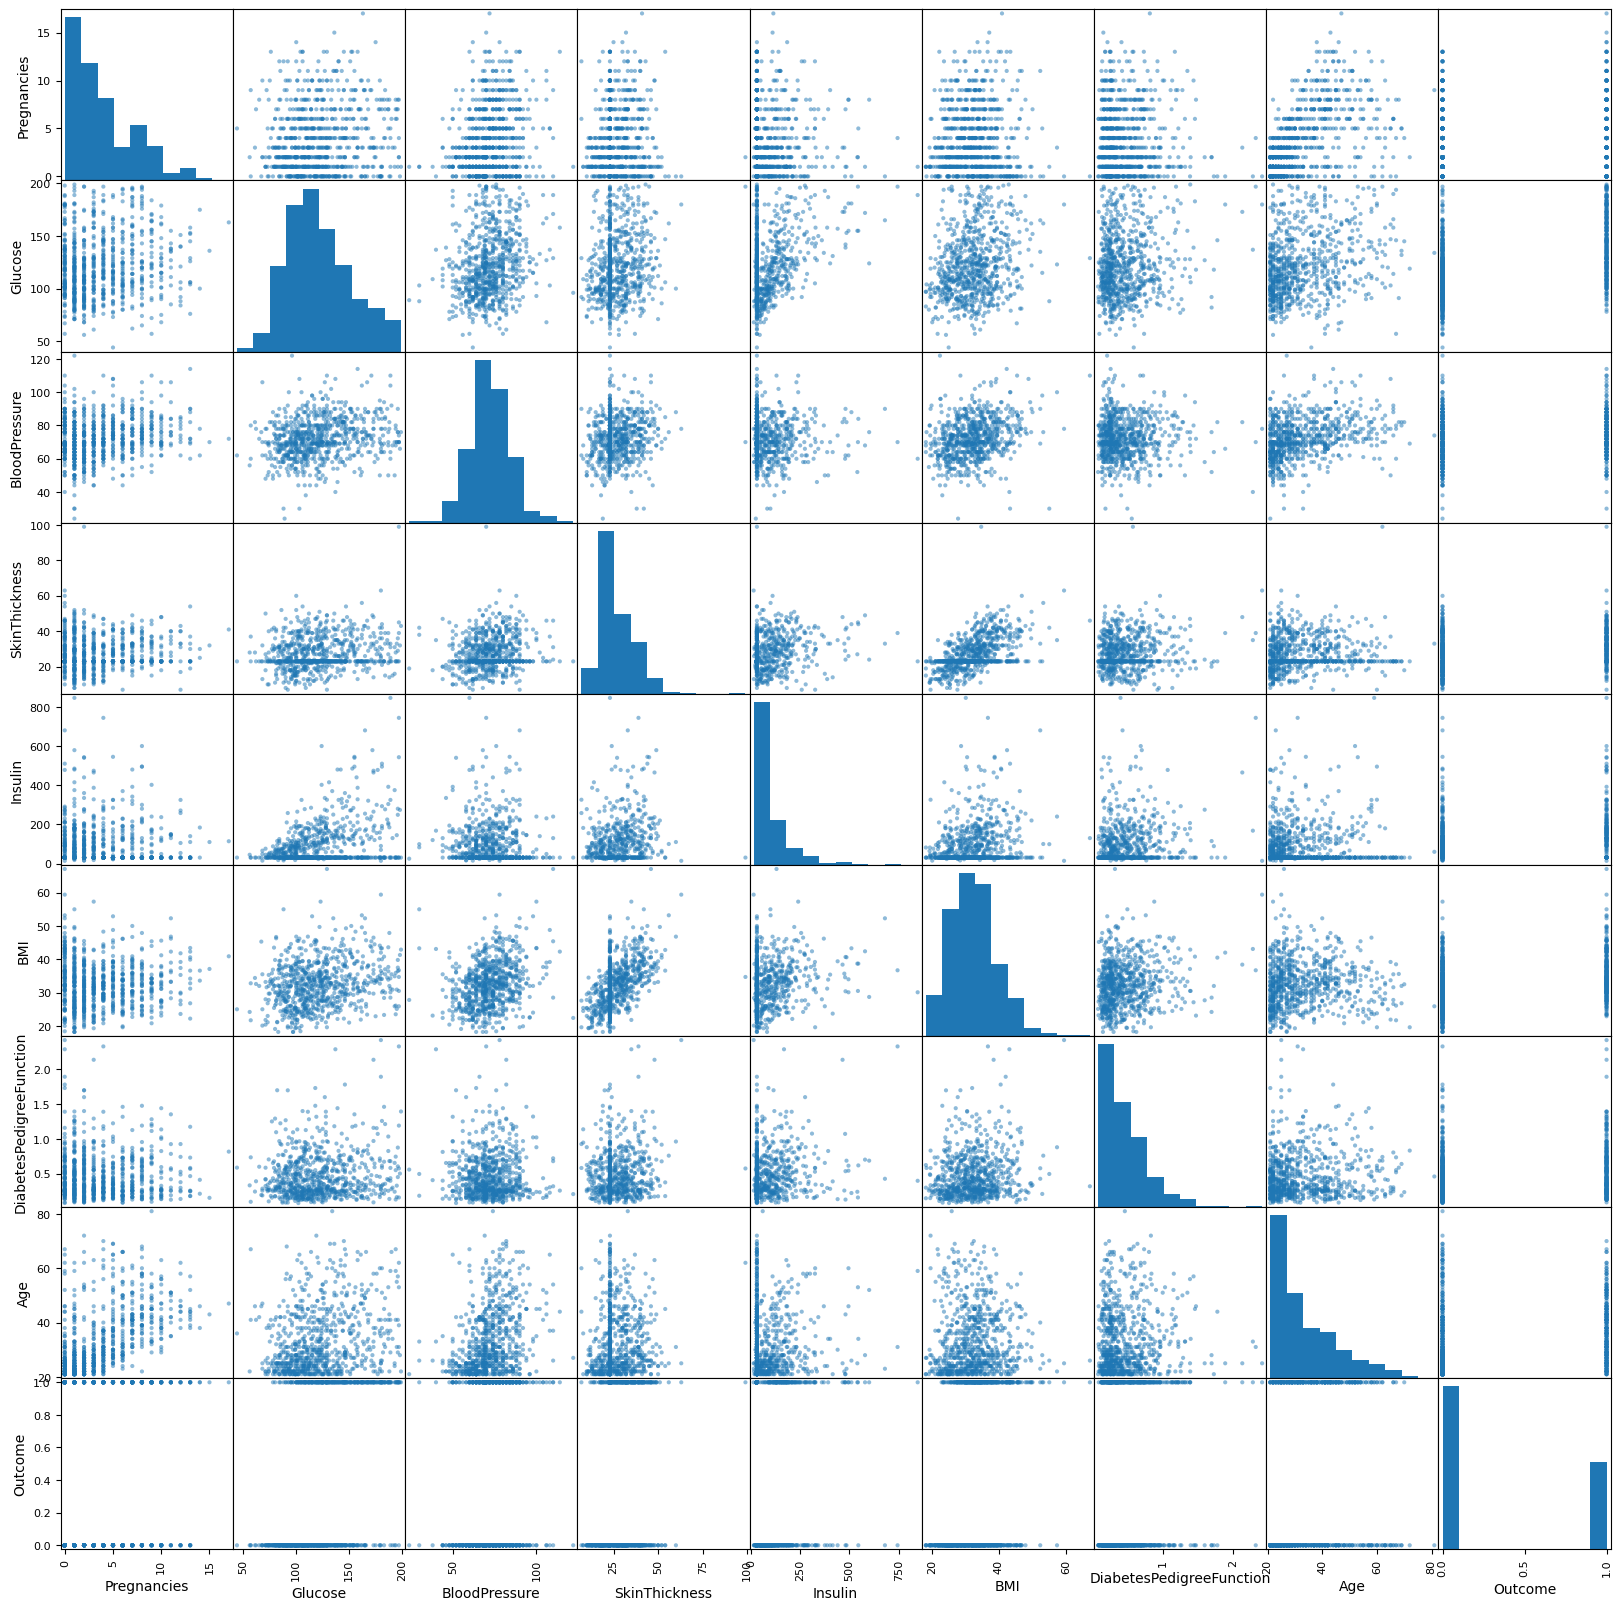

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize =(20,20))
plt.show()

## we can come to varius conclusion looking at these plots . for example if we ovserve 5th plot , we can conclude that women with higher no. of pragnencies have lower insulin.

# 5) Feature Selection

### Pearson's Correlation Coefficient :
Helps us  to find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.



<Axes: >

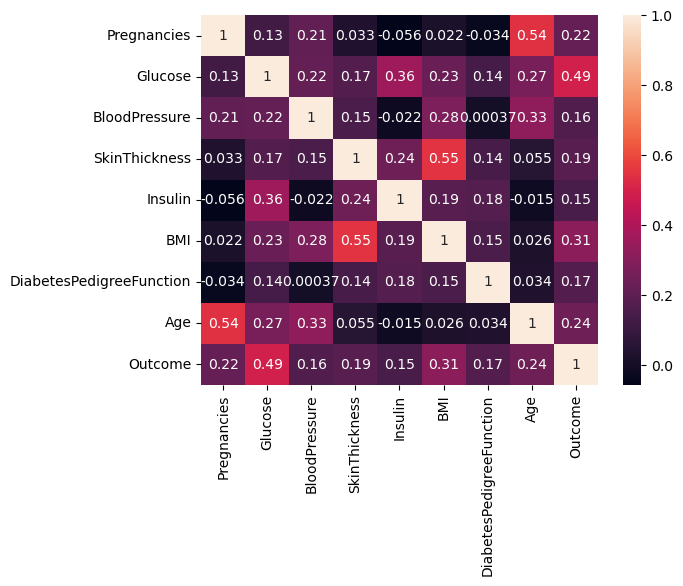

In [17]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)

### CONCLUSION :-
Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them.

In [18]:
selected_df = df.drop(columns = ['BloodPressure','Insulin','DiabetesPedigreeFunction'], axis = 'columns')

In [19]:
selected_df.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1


# 6) Handling Outliers
### Heres we have boxplot to identifying the outliers

1 — What is an Outlier?

An outlier is a data point in a data set that is distant from all other observations.



2 — How can we Identify an outlier?

Using Box plots

Using Scatter plot

Using Z score

I've used Box Plots above in data visualization step to detect outliers.

3 — How am I treating the outliers ?

Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [20]:
from sklearn.preprocessing import QuantileTransformer
x=selected_df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


In [21]:
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

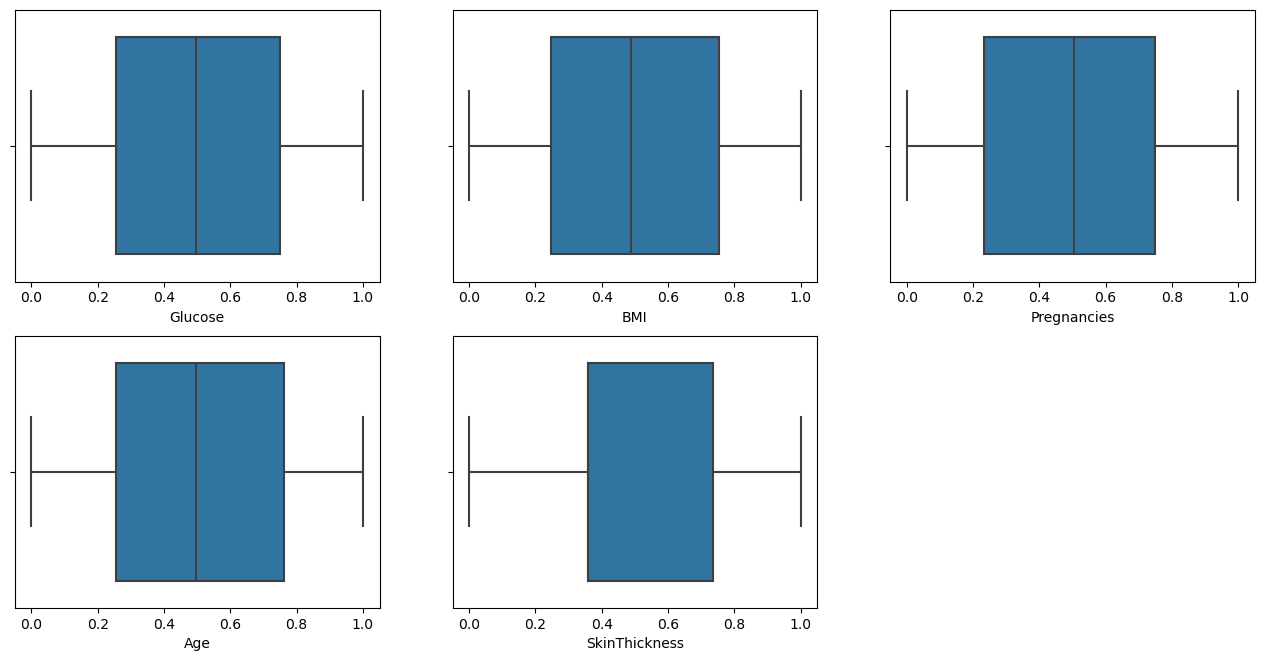

In [22]:
plt.figure(figsize=(16,12))
sns.set_style = 'whitegrid'
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# 7)Split the dataFrame into X nad y

In [23]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [24]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [25]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


## 8) TRAIN TEST SPLIT¶
The train-test split is a technique for evaluating the performance of a machine learning algorithm.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

Common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

I've used 80% train and 20% test
        

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [28]:
X_train.shape

(614, 5)

In [29]:
X_test.shape

(154, 5)

In [30]:
y_train.shape

(614,)

In [31]:
y_test.shape

(154,)

# 9) Build the Classification Algorithm

## 9.1)Logistic Regression:-
Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no."

Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
lr_pred = model.predict(X_test)

In [34]:
lr_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.627906976744186

 Precision score is:
 0.6923076923076923

 Recall score is:
 0.574468085106383

 Confusion Matrix:



<Axes: >

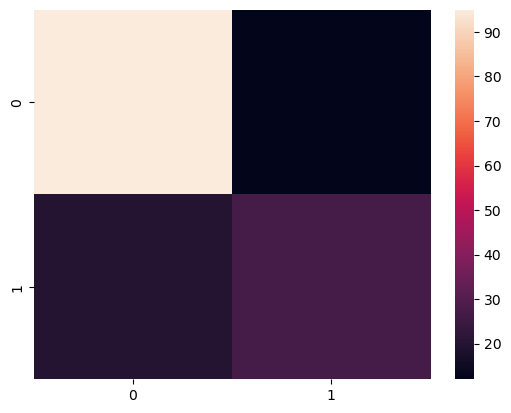

In [36]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

## 9.2) Naive bayes
Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [39]:
nbModel_grid.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.        , 0.95454846, 0.91116276, 0.869749  , 0.83021757,
       0.7924829 , 0.75646333, 0.7220809 , 0.68926121, 0.65793322,
       0.62802914, 0.59948425, 0.57223677, 0.54622772, 0.52140083,
       0.49770236, 0.47508102, 0.45348785, 0.43287613, 0.41320124,
       0.39442061, 0.37649358, 0.35938137, 0.34304693, 0.32745492,...
       0.04862602, 0.04641589, 0.04430621, 0.04229243, 0.04037017,
       0.03853529, 0.0367838 , 0.03511192, 0.03351603, 0.03199267,
       0.03053856, 0.02915053, 0.02782559, 0.02656088, 0.02535364,
       0.02420128, 0.0231013 , 0.02205131, 0.02104904, 0.02009233,
       0.0191791 , 0.01830738, 0.01747528, 0.01668101, 0.01592283,
       0.01519911, 0.01450829, 0.01384886, 0.01321941, 0.01261857,
       0.01204504, 0.01149757, 0.01097499, 0.01047616, 0.01      ])},
             verbose=1)

In [51]:
nb_pred = nbModel_grid.predict(X_test)

In [52]:
nb_pred

array([1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.5813953488372093

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



<Axes: >

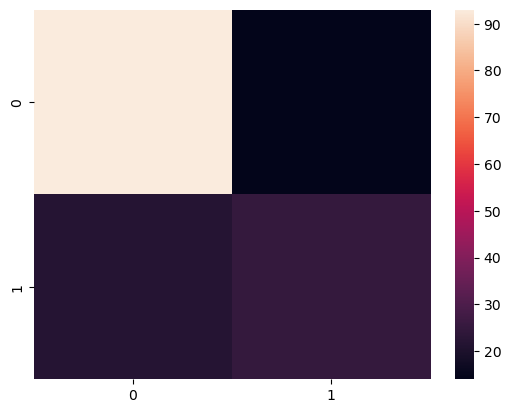

In [56]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

## 9.3) Support vector Machine
It is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., has diabetes vs doesn't have diabetes ) on either side of the plane.

In [59]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [60]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [61]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [62]:
grid_result = grid_search.fit(X, y)

In [63]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       107
         1.0       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154


 F1:
 0.7032967032967034

 Precision score is:
 0.7272727272727273

 Recall score is:
 0.6808510638297872

 Confusion Matrix:



<Axes: >

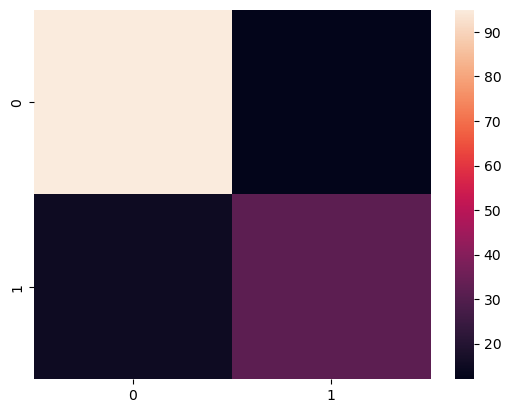

In [66]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,svm_pred))
print("\n Precision score is:\n",precision_score(y_test,svm_pred))
print("\n Recall score is:\n",recall_score(y_test,svm_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

# 9.4) Random Forest:-
The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions.

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [69]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [70]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [71]:
best_model = grid_search.fit(X_train, y_train)

In [72]:
rf_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       107
         1.0       0.64      0.68      0.66        47

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6597938144329897

 Precision score is:
 0.64

 Recall score is:
 0.6808510638297872

 Confusion Matrix:



<Axes: >

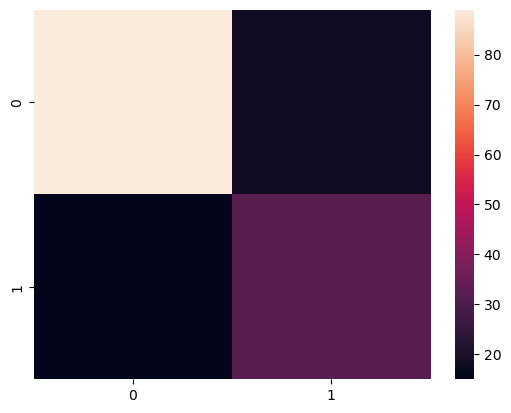

In [74]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,rf_pred))
print("\n Precision score is:\n",precision_score(y_test,rf_pred))
print("\n Recall score is:\n",recall_score(y_test,rf_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

# 9.5) K Nearest Neighbours :-
KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.


In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [76]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [77]:
best_model = grid_search.fit(X_train,y_train)

In [78]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [79]:
#Predict testing set
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<Axes: >

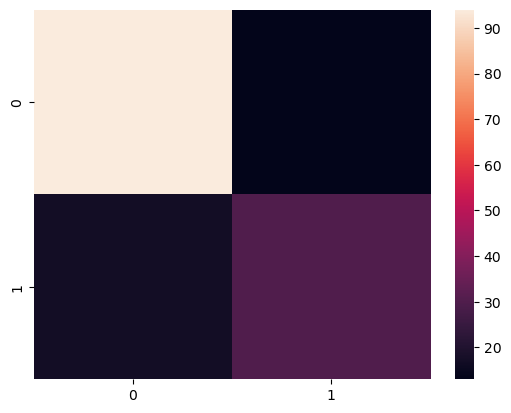

In [80]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))